In [1]:
from moviepy.editor import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
clip = VideoFileClip("input/20200411_152845_001.mp4")

In [14]:
clip = clip.fx(afx.audio_normalize)

In [15]:
bling = clip.audio.to_soundarray()

In [16]:
bla = np.mean(np.abs(bling), axis=1)

In [17]:
def moving_average(a, n=50) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [18]:
blo = moving_average(bla)

In [19]:
peak_found = False
for t in range(len(bla)):
    if blo[t] > 0.2:
        break
    

In [20]:
t = np.argmax(blo[t-500:t+1000]) + t - 500

In [21]:
t

128696

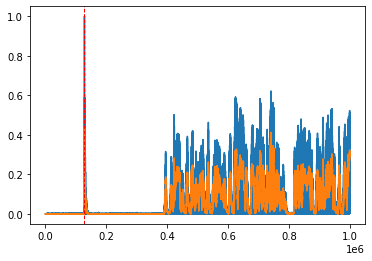

In [22]:
plt.plot(bla[:1000000])
plt.plot(blo[:1000000])
#plt.plot(bla[100000:114000])
plt.axvline(t, c="red", lw=1, ls="--")

In [9]:
bla[t-500:t+500].argmax()

629

In [14]:
t+bla[t-500:t+500].argmax() - 500

106590

In [47]:
blo = moving_average(bla)

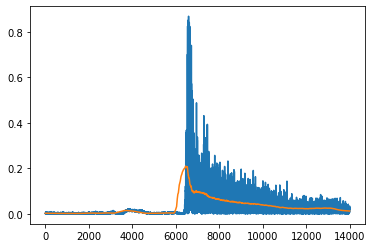

In [48]:
plt.plot(bla[100000:114000])
plt.plot(blo[100000:114000])
#plt.plot(bla[100000:114000])

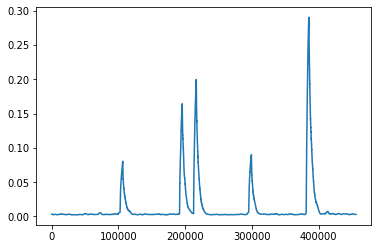

In [41]:
plt.plot(blo)

In [47]:
bling >0.2

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [41]:
del(bling)

In [6]:
clip

In [5]:
# Plays the note A (a sine wave of frequency 440HZ)
import numpy as np
make_frame = lambda t: 2*[ np.sin(440 * 2 * np.pi * t) ]
clip = AudioClip(make_frame, duration=5)
clip.preview()

AttributeError: 'AudioClip' object has no attribute 'fps'

In [13]:
#clip = clip.resize( (10,90) )
clip = clip.crop(x_center=300, width=400, y1=100, y2=600)
clip = clip.fx(afx.audio_normalize)

In [14]:
clip.write_videofile("bla3.mp4")

chunk:   0%|          | 2/4944 [00:00<04:52, 16.91it/s, now=None]

Moviepy - Building video bla3.mp4.
MoviePy - Writing audio in bla3TEMP_MPY_wvf_snd.mp3


t:   0%|          | 13/6727 [00:00<00:55, 121.76it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video bla3.mp4



Moviepy - Done !
Moviepy - video ready bla3.mp4
